# **Capstone 3: Customer Lifetime Value**

## Created By: Aufaa Zuhair Syafruddin Putra

## Business Understanding

### Context

Customer Lifetime Value (CLV) atau Nilai Umur Pelanggan adalah ukuran seberapa bernilai seorang pelanggan bagi sebuah perusahaan. Dari nilai ini, perusahaan dapat menentukan berapa banyak keuntungan yang diperoleh dari satu pelanggan serta biaya yang dikeluarkan untuk memperoleh atau mempertahankan pelanggan baru. Angka ini sangat penting bagi perusahaan jika ingin menargetkan pemasaran secara efektif kepada pelanggan yang bernilai tinggi dan untuk memahami bagaimana perubahan perilaku pelanggan perusahaan di masa depan.

### Problem

Bagi perusahaan asuransi, menentukan keuntungan yang dihasilkan dari penjualan produk asuransi sering kali menjadi tantangan. Oleh karena itu, konsep Customer Lifetime Value (CLV) hadir untuk memberikan gambaran mengenai potensi pengembalian finansial dan investasi dari seorang pelanggan, baik dalam jangka pendek maupun jangka panjang. Kemampuan untuk memprediksi CLV menjadi sangat krusial, karena dapat membantu perusahaan menilai apakah calon pemegang polis akan memberikan keuntungan selama masa menjadi pelanggan.

### Stakeholders

tim marketing sebuah perusahaan asusransi kendaraan untuk mengetahui profit bagi penjual asuransi.

### Metric

Penggunaan metriks yang digunakan adalah MAE, MSE, RMSE, dan MAPE. Karena metrik-metrik ini sudah menjadi standar industri dan riset untuk mengukur performa model prediksi berjenis numerik.

## Data Understanding

| Attribute                | Data Type | Description                       |
|--------------------------|-----------|-----------------------------------|
| Vehicle Class            | Object    | Car Type                          |
| Coverage                 | Object    | Insurance Coverage Type           |
| Renew Offer Type         | Object    | Type of insurance renewal         |
| EmploymentStatus         | Object    | Customer Employment Status        |
| Marital Status           | Object    | Customer Marital Status           |
| Education                | Object    | Customer Education Status         |
| Number of Policies       | Float     | Number of Policies                |
| Monthly Premium Auto     | Float     | Monthly Premium Amount            |
| Total Claim Amount       | Float     | Amount of Insurance Claimed       |
| Income                   | Float     | Customer Income                   |
| Customer Lifetime Value  | Float     | Value of Customer                 |


yang harus pertama kali dilakukan adalah mengimport Library yang akan kita gunakan untuk mengolah dataset

In [146]:
# Importing Essentials

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder


# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

# metric
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

setelah mengimport Library, tahap selanjutnya kita akan load dataset yang akan dipakai

tahap selanjutnya kita akan EDA dan data cleaning

In [147]:
df = pd.read_csv('data_customer_lifetime_value.csv')

# Display the first few rows of the DataFrame
display(df.head())

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


### Data Cleaning

In [148]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [150]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [151]:
df.duplicated().sum()

np.int64(618)

In [152]:
df[df.duplicated(subset=['Customer Lifetime Value'])].sort_values('Customer Lifetime Value')


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
4883,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.800000,0.0,2004.350666
3673,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.800000,0.0,2004.350666
3524,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.800000,0.0,2004.350666
2675,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.800000,0.0,2004.350666
2925,Two-Door Car,Basic,Offer3,Unemployed,Single,College,1.0,66.0,389.944994,0.0,2215.912948
...,...,...,...,...,...,...,...,...,...,...,...
2592,Sports Car,Basic,Offer2,Employed,Married,High School or Below,2.0,109.0,523.200000,20090.0,34611.378960
4053,Four-Door Car,Premium,Offer1,Employed,Divorced,High School or Below,2.0,119.0,571.200000,46587.0,41787.903430
1840,Four-Door Car,Premium,Offer1,Employed,Divorced,High School or Below,2.0,119.0,571.200000,46587.0,41787.903430
2486,Four-Door Car,Premium,Offer1,Employed,Divorced,High School or Below,2.0,119.0,571.200000,46587.0,41787.903430


karena ketidak mungkinan 1 mobil memiliki lebih dari 1 asuransi maka data yang memiliki duplikasi akan di drop

In [153]:
df = df.drop_duplicates()

In [154]:
df.duplicated().sum()

np.int64(0)

### EDA

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5051 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5051 non-null   object 
 1   Coverage                 5051 non-null   object 
 2   Renew Offer Type         5051 non-null   object 
 3   EmploymentStatus         5051 non-null   object 
 4   Marital Status           5051 non-null   object 
 5   Education                5051 non-null   object 
 6   Number of Policies       5051 non-null   float64
 7   Monthly Premium Auto     5051 non-null   float64
 8   Total Claim Amount       5051 non-null   float64
 9   Income                   5051 non-null   float64
 10  Customer Lifetime Value  5051 non-null   float64
dtypes: float64(5), object(6)
memory usage: 473.5+ KB


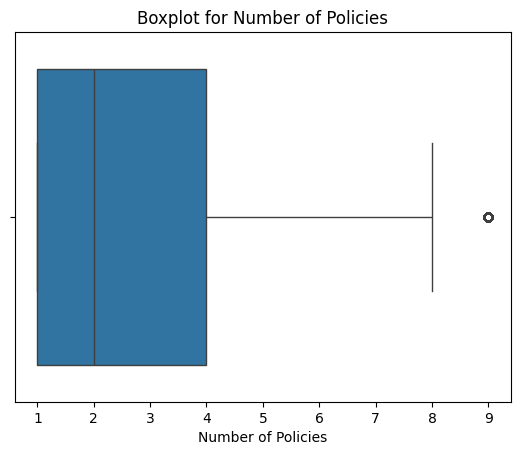

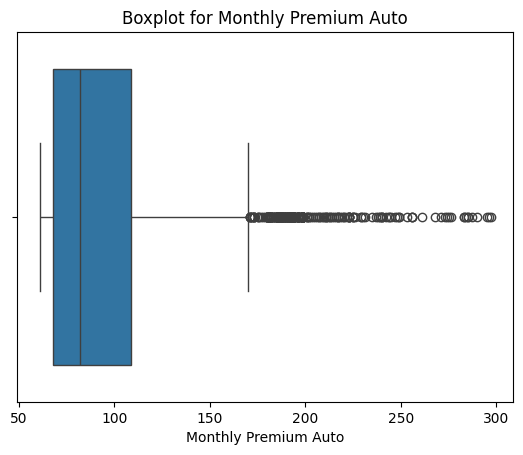

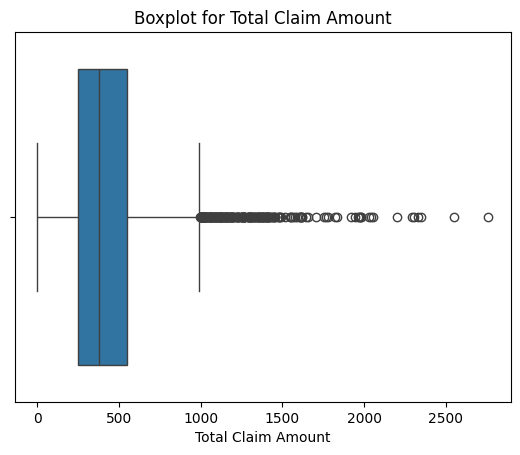

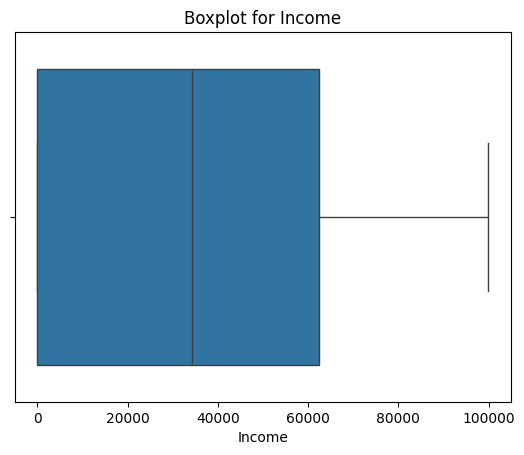

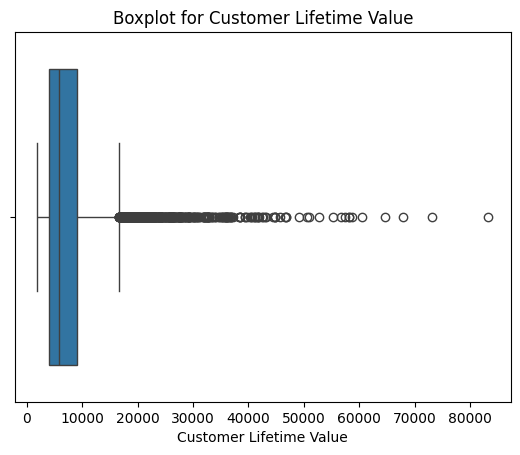

In [156]:
# Boxplot Data Distribution
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

interpretasi:

1. Number of Policies
Sebagian besar pelanggan memiliki antara 1 hingga 4 polis, dengan median berada pada angka 2 polis. Distribusi data cenderung miring ke kanan, menunjukkan bahwa hanya sedikit pelanggan yang memiliki polis dalam jumlah banyak. Terlihat satu titik outlier di nilai 9, yang mengindikasikan ada pelanggan dengan jumlah polis sangat tinggi dibandingkan mayoritas.

2. Monthly Premium Auto
Mayoritas nilai premi bulanan kendaraan berada pada kisaran 80 hingga 150, dengan median sekitar 100. Namun, terlihat banyak sekali outlier yang berada di atas 160 hingga hampir 300, menandakan adanya pelanggan yang membayar premi bulanan jauh lebih besar daripada rata-rata.

3. Total Claim Amount
Jumlah klaim total mayoritas berada di kisaran 300 hingga 800, dengan median sekitar 500. Terdapat banyak outlier di atas 1.000 hingga mencapai sekitar 2.700, yang menunjukkan adanya sebagian kecil pelanggan yang mengajukan klaim dalam jumlah sangat tinggi.

4. Income
Pendapatan pelanggan bervariasi dari 0 hingga 100.000, dengan median sekitar 40.000. Distribusinya relatif merata tanpa outlier ekstrem yang terpisah jauh, menunjukkan data pendapatan cukup terdistribusi normal di sekitar nilai tengah.

5. Customer Lifetime Value (CLV)
Sebagian besar nilai CLV berada di bawah 15.000, dengan median sekitar 8.000. Namun, terdapat banyak outlier yang nilainya mencapai 80.000, mengindikasikan bahwa sejumlah kecil pelanggan memberikan nilai seumur hidup yang sangat tinggi bagi perusahaan dibandingkan dengan mayoritas pelanggan lainnya.

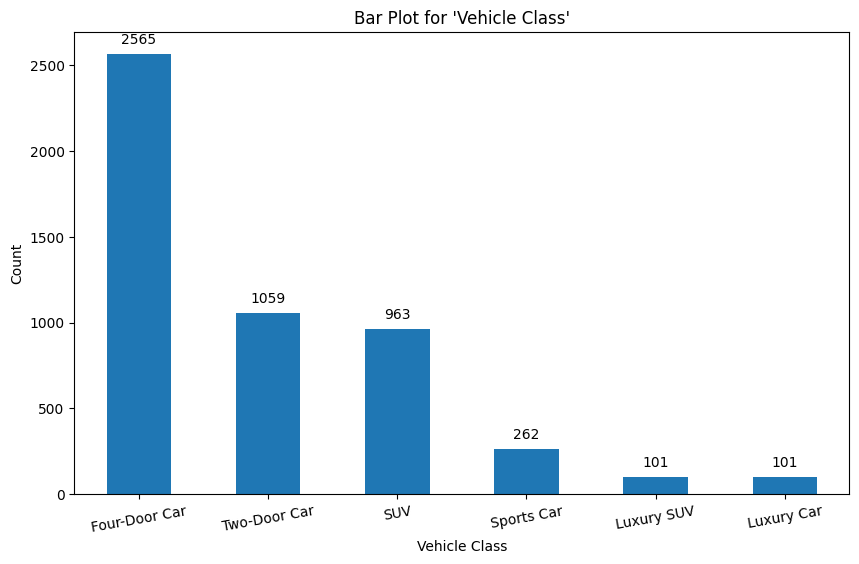

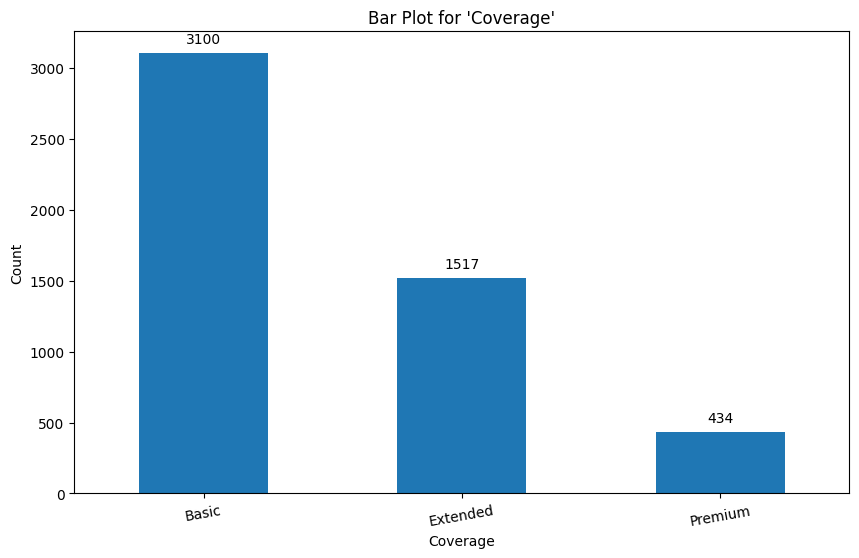

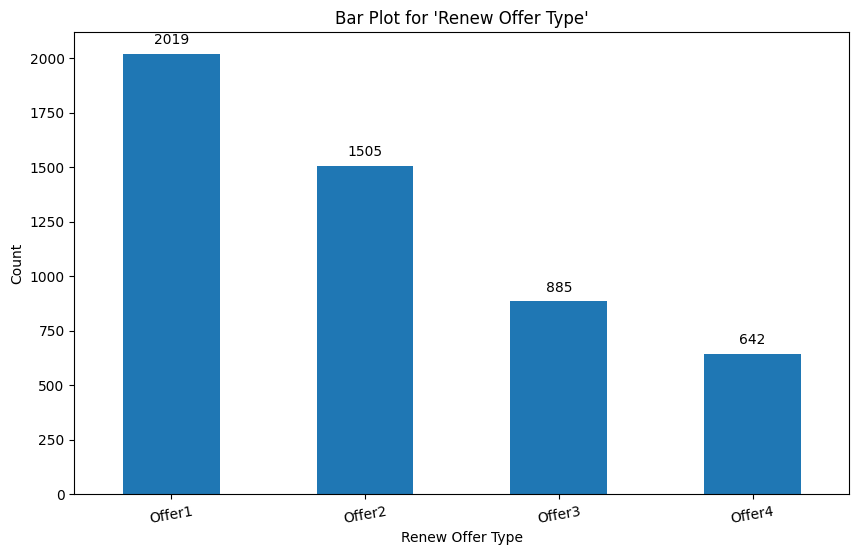

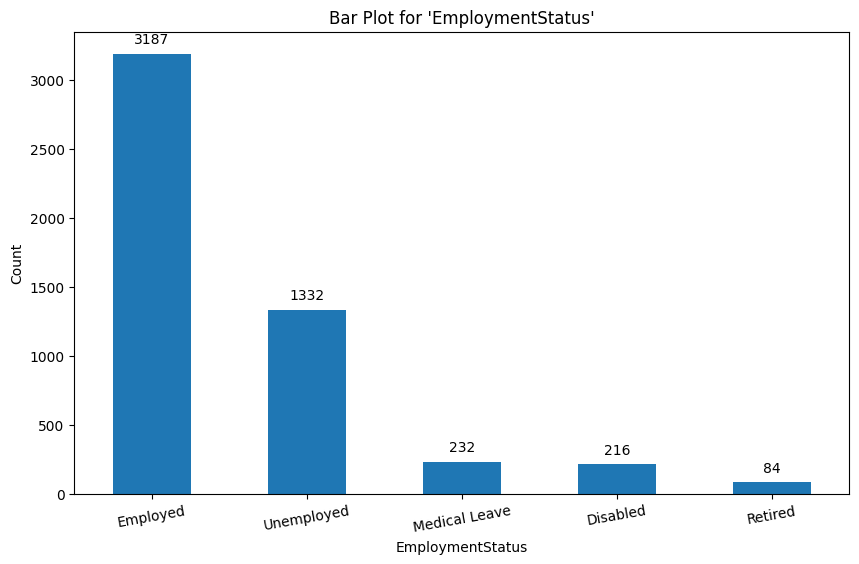

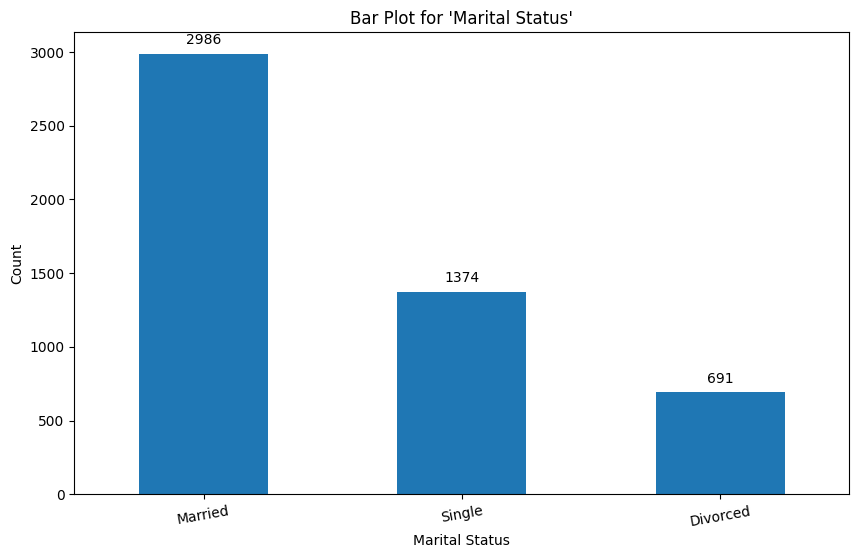

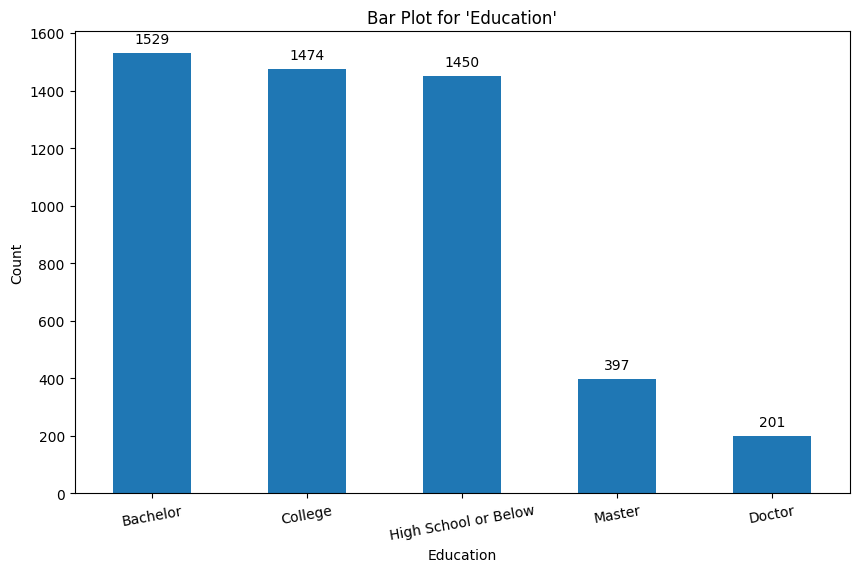

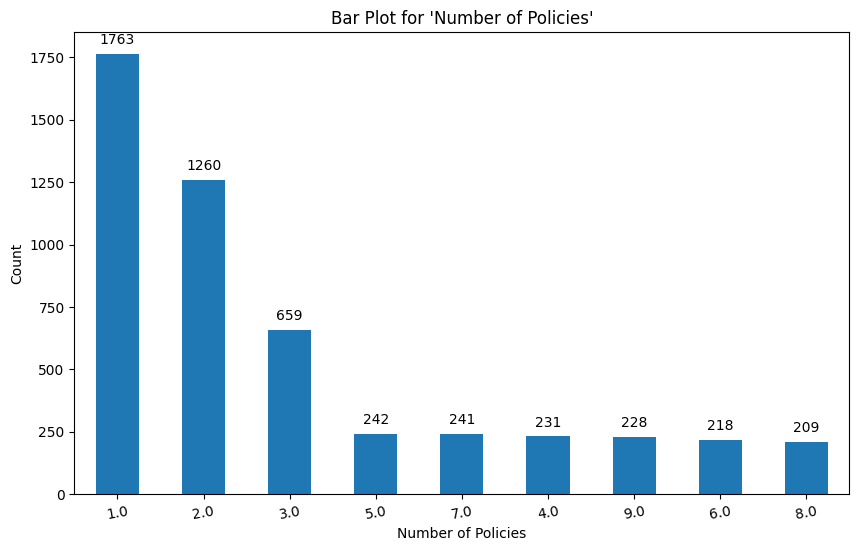

In [157]:
# Daftar kolom kategori yang akan dibuatkan bar plot
categorical_columns = [
    'Vehicle Class', 'Coverage', 'Renew Offer Type',
    'EmploymentStatus', 'Marital Status', 'Education',
    'Number of Policies'
]

# Loop untuk membuat bar plot tiap kolom
for col in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Hitung frekuensi tiap kategori
    counts = df[col].value_counts()

    # membuat bar plot
    ax = counts.plot(kind='bar')
    plt.title(f"Bar Plot for '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=10)

    # penambahan label di setiap bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{int(height)}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # jarak vertikal 5
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.show()


barplot diatas ini bertujuan untuk melihat jumlah setiap kategori yang terdapat dalam fitur

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

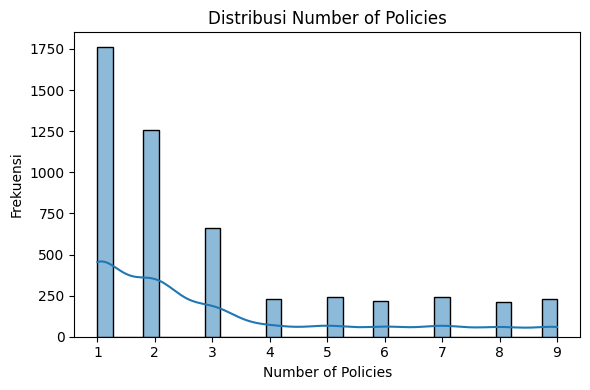

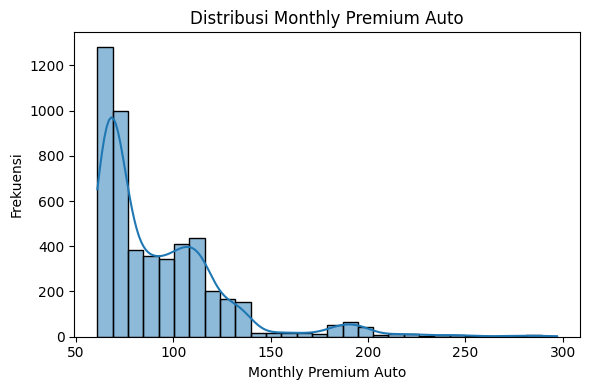

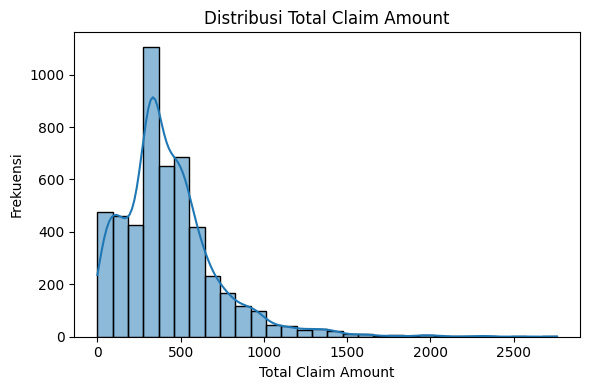

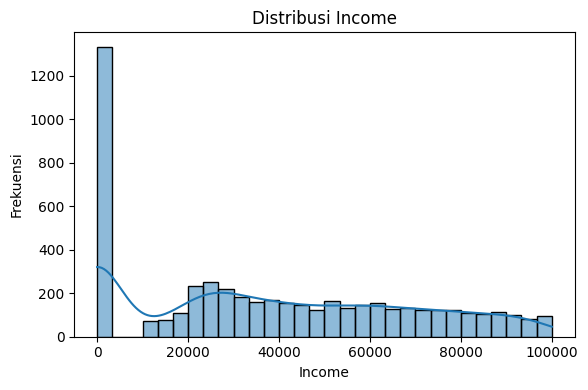

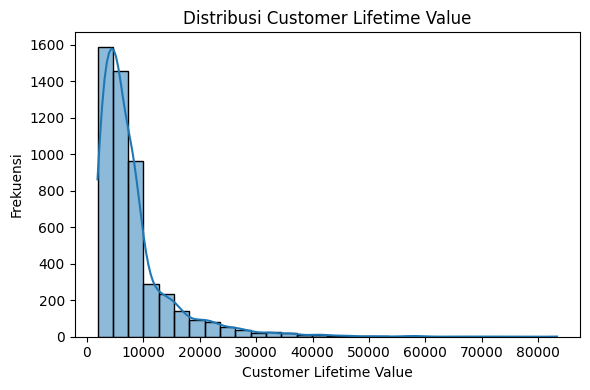

In [158]:
# Loop semua kolom di DataFrame
for col in df.columns:
    plt.figure(figsize=(6,4))

    # Kalau kolom bertipe numerik
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')


    plt.tight_layout()
    plt.show()

interpretasi

1. Distribusi Number of Policies
Distribusi Number of Policies menunjukkan bahwa sebagian besar pelanggan hanya memiliki 1 hingga 3 polis, dengan puncak tertinggi pada 1 polis. Setelah itu, frekuensinya menurun drastis, menunjukkan bahwa hanya sedikit pelanggan yang memiliki banyak polis. Pola ini mengindikasikan bahwa mayoritas pelanggan cenderung berfokus pada satu jenis perlindungan atau layanan tertentu.

2. Distribusi Monthly Premium Auto
Distribusi Monthly Premium Auto tampak condong ke kanan (right-skewed), di mana sebagian besar pelanggan membayar premi bulanan di kisaran 60 hingga 120. Meskipun ada pelanggan dengan premi lebih tinggi, jumlahnya relatif sedikit. Hal ini dapat menunjukkan bahwa premi rendah hingga menengah lebih umum dan mungkin lebih terjangkau bagi sebagian besar pelanggan.

3. Distribusi Total Claim Amount
Pada distribusi Total Claim Amount, terlihat pola right-skewed dengan konsentrasi klaim di bawah 1.000. Puncak klaim berada di kisaran 300–500, dan hanya sedikit pelanggan yang memiliki klaim bernilai sangat tinggi. Kondisi ini mengindikasikan bahwa sebagian besar klaim bersifat kecil hingga menengah, sementara klaim besar jarang terjadi.

4. Distribusi Income
Distribusi Income menunjukkan dua karakteristik menarik: puncak frekuensi pada pendapatan nol (0) dan penyebaran relatif merata di kisaran 10.000 hingga 100.000. Banyaknya nilai nol dapat mengindikasikan pelanggan yang tidak memiliki pendapatan tetap atau data pendapatan yang tidak tercatat.

5. Distribusi Customer Lifetime Value (CLV)
Distribusi Customer Lifetime Value sangat right-skewed, dengan mayoritas pelanggan memiliki CLV di bawah 15.000. Hanya sedikit pelanggan yang memiliki CLV di atas 30.000. Pola ini menunjukkan bahwa sebagian besar pelanggan memberikan nilai kontribusi yang relatif kecil hingga menengah bagi perusahaan, sementara pelanggan bernilai tinggi cukup jarang namun signifikan secara strategis.

<Axes: >

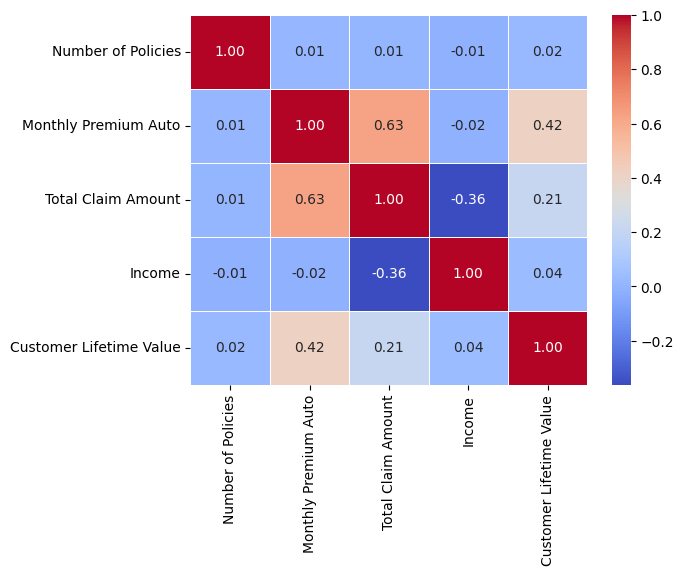

In [159]:
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot = True,fmt = '.2f', cmap = 'coolwarm', linewidths= 0.5)

Heatmap menunjukkan Monthly Premium Auto berkorelasi positif kuat dengan Total Claim Amount (0.63) dan Customer Lifetime Value (0.42), sedangkan Income berkorelasi negatif sedang dengan Total Claim Amount (-0.36). Number of Policies hampir tidak berpengaruh. Korelasi tinggi antar fitur berpotensi menimbulkan multikolinearitas, sehingga perlu pengecekan VIF atau reduksi dimensi.

In [160]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5051 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5051 non-null   object 
 1   Coverage                 5051 non-null   object 
 2   Renew Offer Type         5051 non-null   object 
 3   EmploymentStatus         5051 non-null   object 
 4   Marital Status           5051 non-null   object 
 5   Education                5051 non-null   object 
 6   Number of Policies       5051 non-null   float64
 7   Monthly Premium Auto     5051 non-null   float64
 8   Total Claim Amount       5051 non-null   float64
 9   Income                   5051 non-null   float64
 10  Customer Lifetime Value  5051 non-null   float64
dtypes: float64(5), object(6)
memory usage: 473.5+ KB


## Define X & y

Dalam pengerjaan machine learning, proses mendefinisikan X dan y adalah langkah awal yang sangat penting karena inilah yang menentukan input (fitur) dan output (target) model. Target yang digunakan dalam percobaan kali ini adalah `Customer Lifetime Value`

In [162]:
X = df.drop(columns = 'Customer Lifetime Value')
y = df['Customer Lifetime Value']

## Data Splitting

Data splitting adalah membagi dataset menjadi train set untuk melatih model dan test set untuk menguji kinerjanya pada data baru, kadang ditambah validation set atau menggunakan cross-validation untuk evaluasi yang lebih akurat.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Preprocessing

Untuk tahap preprocessing, menggunakan 2 tahap yaitu encode dan scalling. Untuk tahap encode akan menggunakan One Hot Encoding, untuk tahap scalling akan menggunakan Robust Sclaer

Encode -> One Hot
- Vehicle Class
- Coverage
- Renew Offer Type
- EmploymentStatus
- Marital Status
- Education

Scalling -> RobustScaler

- Number of Policies
- Monthly Premium Auto
- Total Claim Amount
- Income

In [164]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop = 'first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education']),
    ('robust', RobustScaler(), ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income'])
], remainder = 'passthrough')

Dalam machine learning, transformer bertujuan mengubah data mentah menjadi representasi yang lebih sesuai untuk model, baik melalui transformasi fitur seperti scaling dan encoding

In [165]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'Coverage',
                                  'Renew Offer Type', 'EmploymentStatus',
                                  'Marital Status', 'Education']),
                                ('robust', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income'])])

setelah membuat kolom transformer, maka tahap selanjutnya kolom transformer tersebut di fit ke X_train

In [166]:
# fit ke X_train
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'Coverage',
                                  'Renew Offer Type', 'EmploymentStatus',
                                  'Marital Status', 'Education']),
                                ('robust', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income'])])

In [167]:
# transform ke X_train dan X_test
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

In [168]:
# tabel hasil preprocessing
df_X_train_prep = pd.DataFrame(X_train_prep)
df_X_train_prep

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.707317,0.544968,0.824629
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.634146,1.367607,-0.556031
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.707317,-1.043732,0.459297
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.512195,0.415926,0.012227
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.666667,-0.414634,-1.198857,0.324225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,-0.333333,-0.439024,-1.003291,0.621067
4036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2.333333,-0.048780,0.044932,0.275190
4037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.000000,-0.365854,-0.164760,-0.195793
4038,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.333333,0.878049,0.657879,-0.092165


In [169]:
# lihat nama kolom
col_names = transformer.get_feature_names_out()
col_names, len(col_names)

(array(['onehot__Vehicle Class_Luxury Car',
        'onehot__Vehicle Class_Luxury SUV', 'onehot__Vehicle Class_SUV',
        'onehot__Vehicle Class_Sports Car',
        'onehot__Vehicle Class_Two-Door Car', 'onehot__Coverage_Extended',
        'onehot__Coverage_Premium', 'onehot__Renew Offer Type_Offer2',
        'onehot__Renew Offer Type_Offer3',
        'onehot__Renew Offer Type_Offer4',
        'onehot__EmploymentStatus_Employed',
        'onehot__EmploymentStatus_Medical Leave',
        'onehot__EmploymentStatus_Retired',
        'onehot__EmploymentStatus_Unemployed',
        'onehot__Marital Status_Married', 'onehot__Marital Status_Single',
        'onehot__Education_College', 'onehot__Education_Doctor',
        'onehot__Education_High School or Below',
        'onehot__Education_Master', 'robust__Number of Policies',
        'robust__Monthly Premium Auto', 'robust__Total Claim Amount',
        'robust__Income'], dtype=object),
 24)

In [170]:
df_X_train_prep.columns = col_names
df_X_train_prep

,onehot__Vehicle Class_Luxury Car,onehot__Vehicle Class_Luxury SUV,onehot__Vehicle Class_SUV,onehot__Vehicle Class_Sports Car,onehot__Vehicle Class_Two-Door Car,onehot__Coverage_Extended,onehot__Coverage_Premium,onehot__Renew Offer Type_Offer2,onehot__Renew Offer Type_Offer3,onehot__Renew Offer Type_Offer4,...,onehot__Marital Status_Married,onehot__Marital Status_Single,onehot__Education_College,onehot__Education_Doctor,onehot__Education_High School or Below,onehot__Education_Master,robust__Number of Policies,robust__Monthly Premium Auto,robust__Total Claim Amount,robust__Income
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.707317,0.544968,0.824629
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.634146,1.367607,-0.556031
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.707317,-1.043732,0.459297
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.512195,0.415926,0.012227
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.666667,-0.414634,-1.198857,0.324225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,-0.333333,-0.439024,-1.003291,0.621067
4036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2.333333,-0.048780,0.044932,0.275190
4037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.000000,-0.365854,-0.164760,-0.195793
4038,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.333333,0.878049,0.657879,-0.092165


Tabel tersebut adalah hasil preprocessing dengan one-hot encoding dan robust scaling. Hasilnya, semua data telah berbentuk numerik dan berskala seragam, sehingga siap digunakan pada model machine learning.

## Modeling

### Temporary Model

In [171]:
# Temporary Modeling

model = LinearRegression()

model.fit(X_train_prep, y_train)

LinearRegression()

In [172]:
y_pred = model.predict(X_test_prep)
y_pred

array([21406.28855676,  7269.58817229,  5551.38707569, ...,
        5300.36043119,  9400.75360261,  5162.34702827], shape=(1011,))

In [173]:
linreg_mae = mean_absolute_error(y_test, y_pred)
linreg_mae

3877.1386256561773

In [174]:
print(linreg_mae, 'Linear Regression MAE')

3877.1386256561773 Linear Regression MAE


### Cross-Validation

Tujuan cross-validation adalah untuk menguji performa model machine learning secara lebih akurat dengan membaginya menjadi beberapa subset data pelatihan dan pengujian. Teknik ini membantu mengukur kemampuan model dalam generalization (memproses data baru), mengurangi risiko overfitting, dan memastikan evaluasi tidak hanya bergantung pada satu pembagian data saja.

In [175]:
linreg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors = 5)
dectree = DecisionTreeRegressor(criterion = 'absolute_error', min_samples_leaf = 1, max_depth = 5, random_state = 0)
lasso = Lasso(alpha = 1)
ridge = Ridge(alpha = 1)

In [176]:
list_algoritma = [linreg, knn, dectree, lasso, ridge]
hasil_cv = []
mean_hasil = []
std_hasil = []

for algoritma in list_algoritma:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algoritma)
    ])

    cv_score = cross_val_score(
        estimator = pipe_model,
        X = X_train,
        y = y_train,
        cv= 5,
        scoring = 'neg_mean_absolute_error'

    )

    # hasil_cv.append(cv_score)
    mean_hasil.append(cv_score.mean())
    std_hasil.append(cv_score.std())

In [177]:
df_cv = pd.DataFrame()
df_cv['Algoritma'] = list_algoritma
df_cv['MAE'] = mean_hasil
df_cv['Std_MAE'] = std_hasil

df_cv

,Algoritma,MAE,Std_MAE
0,LinearRegression(),-3909.921590,159.711396
1,KNeighborsRegressor(),-3937.572527,177.846975
2,DecisionTreeRegressor(criterion='absolute_erro...,-1677.930729,123.292341
3,Lasso(alpha=1),-3907.903228,159.315816
4,Ridge(alpha=1),-3909.360483,159.596840


In [178]:
list_algoritma = [linreg, knn, dectree, lasso, ridge]
hasil_cv = []
mean_hasil = []
std_hasil = []

for algoritma in list_algoritma:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algoritma)
    ])

    cv_score = cross_val_score(
        estimator = pipe_model,
        X = X_train,
        y = y_train,
        cv= 5,
        scoring = 'neg_root_mean_squared_error'

    )

    mean_hasil.append(cv_score.mean())
    std_hasil.append(cv_score.std())

In [179]:
df_cv['RMSE'] = mean_hasil
df_cv['Std_RMSE'] = std_hasil

df_cv

,Algoritma,MAE,Std_MAE,RMSE,Std_RMSE
0,LinearRegression(),-3909.921590,159.711396,-6301.641581,464.335572
1,KNeighborsRegressor(),-3937.572527,177.846975,-6667.569305,442.020208
2,DecisionTreeRegressor(criterion='absolute_erro...,-1677.930729,123.292341,-4476.932851,465.532208
3,Lasso(alpha=1),-3907.903228,159.315816,-6298.812710,463.947605
4,Ridge(alpha=1),-3909.360483,159.596840,-6300.365208,464.061625


In [180]:
list_algoritma = [linreg, knn, dectree, lasso, ridge]
hasil_cv = []
mean_hasil = []
std_hasil = []

for algoritma in list_algoritma:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algoritma)
    ])

    cv_score = cross_val_score(
        estimator = pipe_model,
        X = X_train,
        y = y_train,
        cv= 5,
        scoring = 'neg_mean_squared_error'

    )

    mean_hasil.append(cv_score.mean())
    std_hasil.append(cv_score.std())

In [181]:
df_cv['MSE'] = mean_hasil
df_cv['Std_MSE'] = std_hasil

df_cv

,Algoritma,MAE,Std_MAE,RMSE,Std_RMSE,MSE,Std_MSE
0,LinearRegression(),-3909.921590,159.711396,-6301.641581,464.335572,-3.992629e+07,5.765914e+06
1,KNeighborsRegressor(),-3937.572527,177.846975,-6667.569305,442.020208,-4.465186e+07,5.935109e+06
2,DecisionTreeRegressor(criterion='absolute_erro...,-1677.930729,123.292341,-4476.932851,465.532208,-2.025965e+07,4.014680e+06
3,Lasso(alpha=1),-3907.903228,159.315816,-6298.812710,463.947605,-3.989029e+07,5.759172e+06
4,Ridge(alpha=1),-3909.360483,159.596840,-6300.365208,464.061625,-3.990995e+07,5.761728e+06


In [182]:
list_algoritma = [linreg, knn, dectree, lasso, ridge]
hasil_cv = []
mean_hasil = []
std_hasil = []

for algoritma in list_algoritma:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algoritma)
    ])

    cv_score = cross_val_score(
        estimator = pipe_model,
        X = X_train,
        y = y_train,
        cv= 5,
        scoring = 'neg_mean_absolute_percentage_error'

    )

    mean_hasil.append(cv_score.mean())
    std_hasil.append(cv_score.std())

In [183]:
df_cv['MAPE'] = mean_hasil
df_cv['Std_MAPE'] = std_hasil

df_cv

,Algoritma,MAE,Std_MAE,RMSE,Std_RMSE,MSE,Std_MSE,MAPE,Std_MAPE
0,LinearRegression(),-3909.921590,159.711396,-6301.641581,464.335572,-3.992629e+07,5.765914e+06,-0.596029,0.026417
1,KNeighborsRegressor(),-3937.572527,177.846975,-6667.569305,442.020208,-4.465186e+07,5.935109e+06,-0.578617,0.038587
2,DecisionTreeRegressor(criterion='absolute_erro...,-1677.930729,123.292341,-4476.932851,465.532208,-2.025965e+07,4.014680e+06,-0.112460,0.008038
3,Lasso(alpha=1),-3907.903228,159.315816,-6298.812710,463.947605,-3.989029e+07,5.759172e+06,-0.595917,0.026546
4,Ridge(alpha=1),-3909.360483,159.596840,-6300.365208,464.061625,-3.990995e+07,5.761728e+06,-0.596030,0.026510


Tabel tersebut menunjukkan hasil evaluasi beberapa algoritma regresi menggunakan metrik MAE, RMSE, MSE, dan MAPE beserta standar deviasinya dari proses cross-validation.

1. Linear Regression, Lasso, dan Ridge memiliki performa hampir sama, dengan MAE sekitar -3909, RMSE sekitar -6300, dan MAPE sekitar -0.596.
2. KNeighborsRegressor memiliki MAE sedikit lebih tinggi (-3937) dan RMSE lebih besar (-6667)
3. Decision Tree Regressor menonjol dengan MAE jauh lebih rendah (-1677) dan MAPE sangat kecil (-0.112), menunjukkan akurasi prediksi yang jauh lebih baik dalam hal kesalahan absolut relatif. Namun, RMSE-nya (-4476) masih cukup besar

Kesimpulannya, Decision Tree Regressor memiliki performa terbaik dari segi MAE dan MAPE

#### Cek Multicollinearty

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [185]:
variance_inflation_factor(X_train_prep, 1)

np.float64(7.336381922404343)

In [186]:
vif_value = [variance_inflation_factor(X_train_prep, col_names) for col_names in range (X_train_prep.shape[1])]
vif_value

[np.float64(7.168186743980015),
 np.float64(7.336381922404343),
 np.float64(7.762572752811643),
 np.float64(2.8436747650810066),
 np.float64(1.3858100882466886),
 np.float64(3.6264957961745856),
 np.float64(4.845905299706031),
 np.float64(1.8548570578098937),
 np.float64(1.4692640036376377),
 np.float64(1.3999716038996874),
 np.float64(8.791360894699734),
 np.float64(1.4092667934529919),
 np.float64(1.1429576131019263),
 np.float64(4.60301343743037),
 np.float64(4.947661240570988),
 np.float64(3.091028377761691),
 np.float64(1.8807520860525988),
 np.float64(1.1278463170957396),
 np.float64(1.9277253591845886),
 np.float64(1.2512363473035109),
 np.float64(1.1830547505888667),
 np.float64(25.08029299268076),
 np.float64(2.4364997079460236),
 np.float64(3.0505802747530253)]

In [187]:
def calc_vif(table):

    vif_df = pd.DataFrame()
    vif_df['feauture'] = table.columns

    vif_value = [variance_inflation_factor(table.values, kolom) for kolom in range (table.shape[1])]
    vif_df['vif'] = vif_value
    return vif_df

calc_vif(df_X_train_prep)

,feauture,vif
0,onehot__Vehicle Class_Luxury Car,7.168187
1,onehot__Vehicle Class_Luxury SUV,7.336382
2,onehot__Vehicle Class_SUV,7.762573
3,onehot__Vehicle Class_Sports Car,2.843675
4,onehot__Vehicle Class_Two-Door Car,1.385810
5,onehot__Coverage_Extended,3.626496
6,onehot__Coverage_Premium,4.845905
7,onehot__Renew Offer Type_Offer2,1.854857
8,onehot__Renew Offer Type_Offer3,1.469264
9,onehot__Renew Offer Type_Offer4,1.399972


hasil dari pengecekan multicollinearity untuk kolom `robust__Monthly Premium Auto` begitu besar makan kolom tersebut akan di drop

In [188]:
def calc_vif(table):
    if 'robust__Monthly Premium Auto' in table.columns:
        table = table.drop(columns=['robust__Monthly Premium Auto'])
    
    vif_df = pd.DataFrame()
    vif_df['feature'] = table.columns
    vif_df['vif'] = [variance_inflation_factor(table.values, kolom) 
                     for kolom in range(table.shape[1])]
    return vif_df

calc_vif(df_X_train_prep)


,feature,vif
0,onehot__Vehicle Class_Luxury Car,1.333535
1,onehot__Vehicle Class_Luxury SUV,1.306225
2,onehot__Vehicle Class_SUV,1.604419
3,onehot__Vehicle Class_Sports Car,1.142231
4,onehot__Vehicle Class_Two-Door Car,1.384298
5,onehot__Coverage_Extended,1.537554
6,onehot__Coverage_Premium,1.291006
7,onehot__Renew Offer Type_Offer2,1.845420
8,onehot__Renew Offer Type_Offer3,1.460750
9,onehot__Renew Offer Type_Offer4,1.398019


karena monthly premiun auto memiliki nilai vif tinggi, maka akan didrop

In [189]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop = 'first'), ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education']),
    ('robust', RobustScaler(), ['Number of Policies', 'Total Claim Amount', 'Income']),
    ('drop_MPA', 'drop',['Monthly Premium Auto'])
], remainder = 'passthrough')

## Hyperparameter Tunning

Tujuan hyperparameter tuning pada Decision Tree adalah menemukan kombinasi pengaturan terbaik (seperti max_depth, min_samples_split, atau max_features) agar model menghasilkan prediksi yang akurat, tidak overfitting maupun underfitting, serta mampu generalize dengan baik pada data baru.

In [190]:
# define model
base_tree= DecisionTreeRegressor(max_depth=5, random_state=0)

# fit
base_tree.fit(X_train_prep, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

### Before Tunning

In [191]:
y_pred_before = base_tree.predict(X_test_prep)
y_pred_before

array([42802.71842071,  5191.54358966,  5191.54358966, ...,
        2727.20181443,  4526.95773607,  2451.73547737], shape=(1011,))

In [192]:
y_pred_before_mae = mean_absolute_error(y_test, y_pred_before)
y_pred_before_mae

1818.1808515653408

hasil dari predict sebelum melakukan tunning adalah 1818.18

### Tunning

In [193]:
   # Hyperparameter
hyper_param = {
    'tree__max_depth' : [3,4,5,6,7],
    'tree__min_samples_split': [10,20,30],
    'tree__min_samples_leaf': [5,10,15]
}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('tree', dectree)
])

# Grid Search
grid_search = GridSearchCV(
    estimator = pipe_model,
    param_grid = hyper_param,
    cv= 5,
    scoring = 'neg_mean_absolute_error',
    n_jobs= -1
)

In [194]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Coverage',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'EmploymentStatus',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies',
                                                                          'Total '
                                                                          'Claim '
                                                                          'Amount',
                                                                          'Income']),
                                                                        ('drop_MPA',
                                                                         'drop',
                                                                         ['Monthly '
                                                                          'Premium '
                                                                          'Auto'])])),
                                       ('tree',
                                        DecisionTreeRegressor(criterion='absolute_error',
                                                              max_depth=5,
                                                              random_state=0))]),
             n_jobs=-1,
             param_grid={'tree__max_depth': [3, 4, 5, 6, 7],
                         'tree__min_samples_leaf': [5, 10, 15],
                         'tree__min_samples_split': [10, 20, 30]},
             scoring='neg_mean_absolute_error')

In [195]:
grid_search.best_params_

{'tree__max_depth': 7,
 'tree__min_samples_leaf': 5,
 'tree__min_samples_split': 20}

In [196]:
best_tree = grid_search.best_estimator_
best_tree

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class', 'Coverage',
                                                   'Renew Offer Type',
                                                   'EmploymentStatus',
                                                   'Marital Status',
                                                   'Education']),
                                                 ('robust', RobustScaler(),
                                                  ['Number of Policies',
                                                   'Total Claim Amount',
                                                   'Income']),
                                                 ('drop_MPA', 'drop',
                                                  ['Monthly Premium Auto'])])),
                ('tree',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                                       min_samples_leaf=5, min_samples_split=20,
                                       random_state=0))])

In [197]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'mean_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree__max_depth,param_tree__min_samples_leaf,param_tree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.737612,0.024376,0.010736,0.001871,3,15,10,"{'tree__max_depth': 3, 'tree__min_samples_leaf...",-2507.015027,-2462.082917,-2480.37624,-2376.666155,-2092.977113,-2383.823490,151.832782,43
7,0.649530,0.067401,0.008438,0.000304,3,15,20,"{'tree__max_depth': 3, 'tree__min_samples_leaf...",-2507.015027,-2462.082917,-2480.37624,-2376.666155,-2092.977113,-2383.823490,151.832782,43
8,0.615953,0.052831,0.010336,0.002452,3,15,30,"{'tree__max_depth': 3, 'tree__min_samples_leaf...",-2507.015027,-2462.082917,-2480.37624,-2376.666155,-2092.977113,-2383.823490,151.832782,43
0,0.922702,0.180204,0.014198,0.003338,3,5,10,"{'tree__max_depth': 3, 'tree__min_samples_leaf...",-2482.357639,-2462.082917,-2480.37624,-2376.666155,-2092.977113,-2378.892013,148.106175,37
3,0.833062,0.084619,0.017095,0.003022,3,10,10,"{'tree__max_depth': 3, 'tree__min_samples_leaf...",-2482.357639,-2462.082917,-2480.37624,-2376.666155,-2092.977113,-2378.892013,148.106175,37


#### Menggunakan best params

In [198]:
best_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class', 'Coverage',
                                                   'Renew Offer Type',
                                                   'EmploymentStatus',
                                                   'Marital Status',
                                                   'Education']),
                                                 ('robust', RobustScaler(),
                                                  ['Number of Policies',
                                                   'Total Claim Amount',
                                                   'Income']),
                                                 ('drop_MPA', 'drop',
                                                  ['Monthly Premium Auto'])])),
                ('tree',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                                       min_samples_leaf=5, min_samples_split=20,
                                       random_state=0))])

In [199]:
y_pred_best_model = best_tree.predict(X_test)
y_pred_best_model

array([25807.063   ,  5209.351111,  5209.351111, ...,  2581.5176  ,
        4175.945269,  2581.5176  ], shape=(1011,))

In [200]:
y_pred_best_model_mae = mean_absolute_error(y_test, y_pred_best_model)
y_pred_best_model_mae

1843.483432244807

hasil dari predict setelah melakukan tunning adalah 1843.48

In [201]:
print(y_pred_before_mae, 'DecissionTree Before Tuning')
print(y_pred_best_model_mae, 'DecisisionTree After Tuning','tree__max_depth: 7','tree__min_samples_leaf: 15','tree__min_samples_split: 10')

1818.1808515653408 DecissionTree Before Tuning
1843.483432244807 DecisisionTree After Tuning tree__max_depth: 7 tree__min_samples_leaf: 15 tree__min_samples_split: 10


## Perbandingan Sebelum dan Sesudah Tunning

In [202]:
dif_tunning = y_pred_before_mae - y_pred_best_model_mae
dif_tunning

-25.302580679466246

Perbandingan yang dihasilkan sebelum dan setelah tunning mempunyai selisih sekitar -25.3. Dapat dikatakan bahwa hasil lebih baik ketika sebelum di tunning.

## Feature Importances

<Axes: title={'center': 'Feature Importances'}>

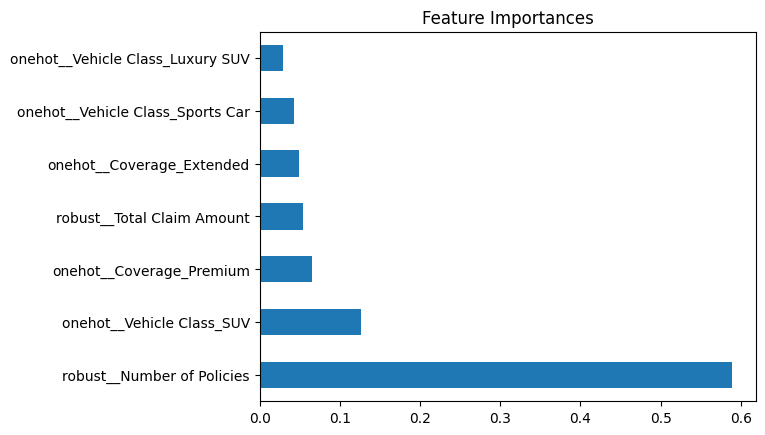

In [203]:
# Ambil pipeline terbaik hasil GridSearch
best_pipe = grid_search.best_estimator_

# Ambil transformer yang sudah fit
fitted_transformer = best_pipe.named_steps['preprocessing']

# Ambil nama kolom setelah transformasi
feature_names = fitted_transformer.get_feature_names_out()

# Ambil feature importance dari Decision Tree
feature_imp = pd.Series(
    best_pipe.named_steps['tree'].feature_importances_,
    index=feature_names
).sort_values(ascending=False).head(7)

# Plot
feature_imp.plot(kind='barh', title='Feature Importances')

- Number of Policies memiliki pengaruh terbesar dalam model (sekitar 0,59), sehingga jumlah polis menjadi indikator utama yang digunakan model untuk membuat prediksi.

- Vehicle Class_SUV berkontribusi cukup signifikan (sekitar 0,12) dibanding variabel lain, menunjukkan bahwa kepemilikan kendaraan SUV juga memengaruhi hasil prediksi.

- Coverage_Premium, Coverage_Extended, dan Total Claim Amount memiliki pengaruh yang relatif kecil (sekitar 0,05–0,07), sehingga perannya lebih sebagai faktor pendukung.

- Vehicle Class_Sports Car dan Vehicle Class_Luxury SUV memiliki pengaruh paling rendah (sekitar 0,02–0,03), sehingga dampaknya terhadap prediksi sangat terbatas.

Secara keseluruhan, model lebih mengandalkan jumlah polis sebagai faktor utama, sementara variabel lain berfungsi untuk melakukan penyesuaian kecil terhadap hasil prediksi.

## Save Model

In [204]:
import joblib

# simpen ke file
joblib.dump(best_tree, 'Final_Model.joblib')

['Final_Model.joblib']

In [205]:
# Load model
model = joblib.load('Final_Model.joblib')


## Prediksi ke Data Baru (Dummy)

In [206]:
import pandas as pd

new_cust = pd.DataFrame({
    'Vehicle Class': ['SUV', 'Sports Car', 'Luxury SUV', 'SUV', 'Sports Car'],
    'Coverage': ['Premium', 'Extended', 'Basic', 'Premium', 'Extended'],
    'Renew Offer Type': ['Offer1', 'Offer2', 'Offer3', 'Offer1', 'Offer4'],
    'EmploymentStatus': ['Employed', 'Unemployed', 'Medical Leave', 'Employed', 'Retired'],
    'Marital Status': ['Married', 'Single', 'Divorced', 'Single', 'Married'],
    'Education': ['Bachelor', 'High School or Below', 'College', 'Bachelor', 'Doctor'],
    'Number of Policies': [5.0, 2.0, 1.0, 3.0, 4.0],
    'Monthly Premium Auto': [100.0, 150.0, 200.0, 120.0, 180.0],
    'Total Claim Amount': [500.0, 800.0, 300.0, 600.0, 700.0],
    'Income': [55000.0, 30000.0, 45000.0, 60000.0, 75000.0],
    'Customer Lifetime Value': [4000.0, 3500.0, 5000.0, 4500.0, 4800.0]
})

new_cust

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,SUV,Premium,Offer1,Employed,Married,Bachelor,5.0,100.0,500.0,55000.0,4000.0
1,Sports Car,Extended,Offer2,Unemployed,Single,High School or Below,2.0,150.0,800.0,30000.0,3500.0
2,Luxury SUV,Basic,Offer3,Medical Leave,Divorced,College,1.0,200.0,300.0,45000.0,5000.0
3,SUV,Premium,Offer1,Employed,Single,Bachelor,3.0,120.0,600.0,60000.0,4500.0
4,Sports Car,Extended,Offer4,Retired,Married,Doctor,4.0,180.0,700.0,75000.0,4800.0


In [207]:
# Prediksi
y_pred = model.predict(new_cust)

# Simpan hasil ke DataFrame
hasil = pd.DataFrame({'prediksi_CLV': y_pred})
print(hasil)

   prediksi_CLV
0  12525.862500
1  16229.648910
2   7595.774031
3  12525.862500
4  10258.233135


## Evaluation

### Residual Plot

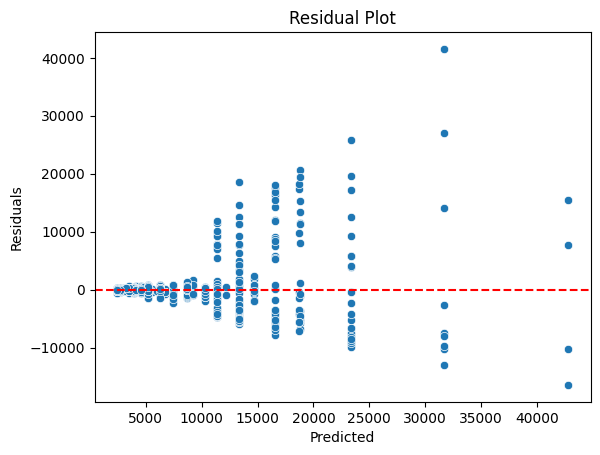

In [208]:
residuals = y_test - y_pred_before
residuals

sns.scatterplot(x = y_pred_before, y = residuals)

plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

1. Sebaran residual melebar pada CLV tinggi → menandakan adanya heteroskedastisitas.

2. Mayoritas residual dekat garis nol → model cukup baik pada CLV rendah hingga menengah.

3. Tidak ada pola lengkung signifikan → hubungan non-linear bukan masalah utama.

4. Banyak outlier pada prediksi tinggi → beberapa data ekstrem memengaruhi performa model.

### Decision Tree Plot

Aturan Decision Tree:

|--- robust__Number of Policies <= -0.17
|   |--- onehot__Vehicle Class_SUV <= 0.50
|   |   |--- robust__Total Claim Amount <= 1.72
|   |   |   |--- onehot__Coverage_Extended <= 0.50
|   |   |   |   |--- onehot__Coverage_Premium <= 0.50
|   |   |   |   |   |--- onehot__Vehicle Class_Sports Car <= 0.50
|   |   |   |   |   |   |--- onehot__Vehicle Class_Luxury SUV <= 0.50
|   |   |   |   |   |   |   |--- value: [2581.52]
|   |   |   |   |   |   |--- onehot__Vehicle Class_Luxury SUV >  0.50
|   |   |   |   |   |   |   |--- value: [7595.77]
|   |   |   |   |   |--- onehot__Vehicle Class_Sports Car >  0.50
|   |   |   |   |   |   |--- robust__Total Claim Amount <= 0.89
|   |   |   |   |   |   |   |--- value: [4361.08]
|   |   |   |   |   |   |--- robust__Total Claim Amount >  0.89
|   |   |   |   |   |   |   |--- value: [3879.25]
|   |   |   |   |--- onehot__Coverage_Premium >  0.50
|   |   |   |   |   |--- onehot__Vehicle Class_Sports Car <= 0.50
|   |   |   |   |   

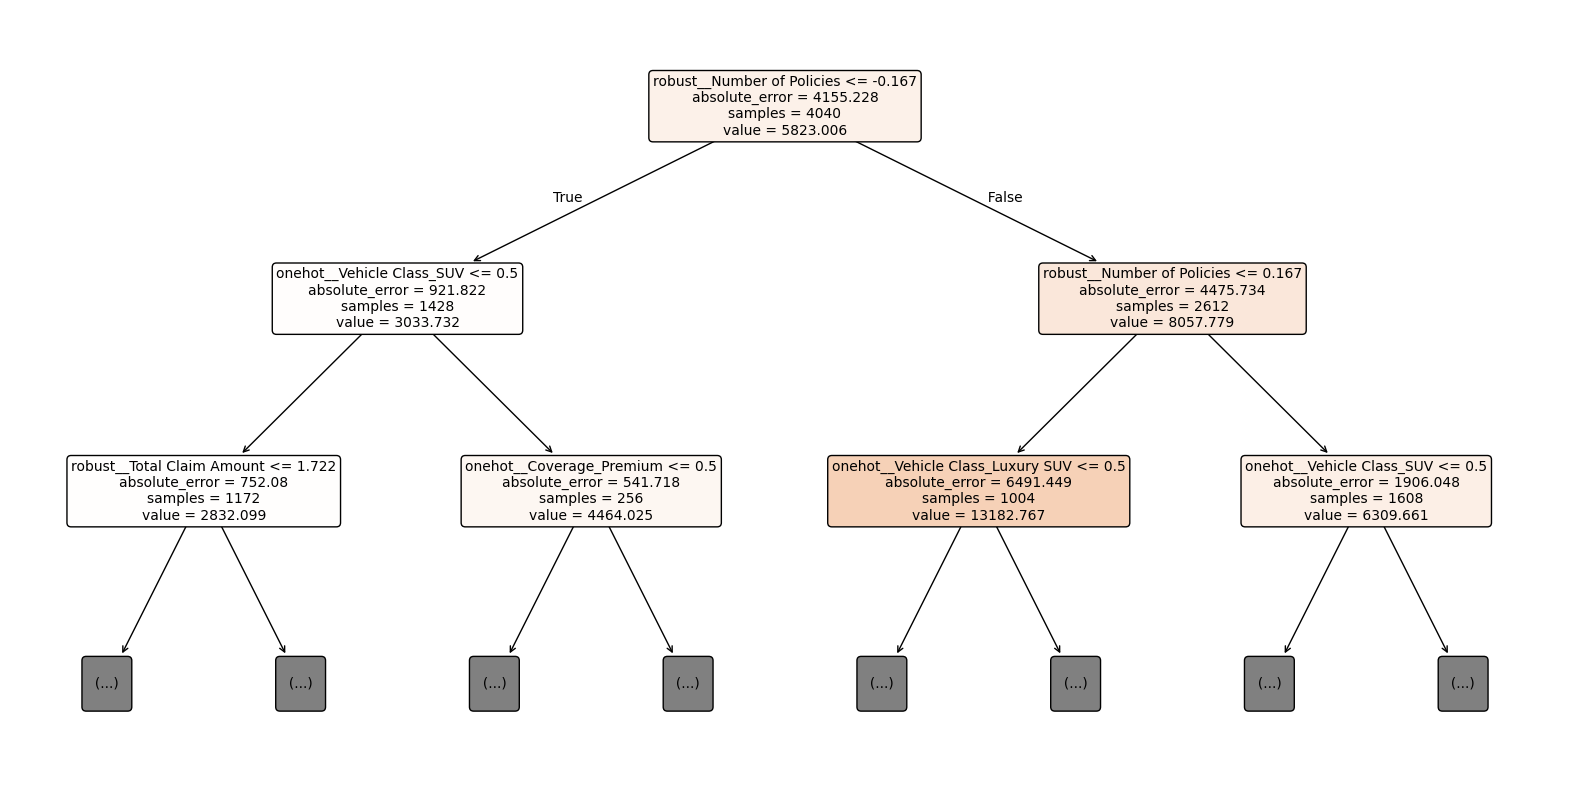

In [209]:
from sklearn.tree import export_text, plot_tree

# Ambil pipeline terbaik
best_pipe = grid_search.best_estimator_

# Ambil feature names dari transformer di pipeline
feature_names = best_pipe.named_steps['preprocessing'].get_feature_names_out()

# Ambil model Decision Tree dari pipeline
dt_model = best_pipe.named_steps['tree']

# Export aturan Decision Tree
tree_rules = export_text(dt_model, feature_names=list(feature_names))
print("Aturan Decision Tree:\n")
print(tree_rules)

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=feature_names, filled=True, rounded=True, fontsize=10, max_depth=2)
plt.show()


Berdasarkan hasil decision tree pada gambar, model memprediksi nilai target dengan mempertimbangkan beberapa faktor utama. Faktor pertama yang paling memengaruhi adalah jumlah polis yang dimiliki nasabah. Jika jumlah polis relatif rendah (berdasarkan nilai setelah di-scale), model kemudian melihat jenis kendaraan. Nasabah yang tidak menggunakan SUV, terutama jika memiliki total klaim rendah, cenderung memiliki nilai target yang lebih rendah. Sebaliknya, jika nasabah menggunakan SUV dan memiliki jenis coverage tertentu, nilai targetnya akan lebih tinggi. Untuk nasabah dengan jumlah polis menengah hingga tinggi, jenis kendaraan kembali menjadi pembeda penting. Nasabah yang memiliki kendaraan Luxury SUV berada pada kelompok dengan nilai target tertinggi, sedangkan yang bukan Luxury SUV cenderung lebih rendah. Secara keseluruhan, jumlah polis menjadi pemisah awal yang paling signifikan, diikuti oleh jenis kendaraan, total klaim, dan jenis coverage sebagai faktor pendukung dalam menentukan nilai prediksi.

## Conclusion

Proyek ini bertujuan memprediksi Customer Lifetime Value (CLV) pelanggan pada perusahaan asuransi, sehingga perusahaan dapat mengidentifikasi pelanggan bernilai tinggi dan menargetkan strategi pemasaran yang lebih efektif. Dengan menggunakan dataset yang berisi informasi demografis dan kebiasaan pembelian pelanggan (seperti Vehicle Class, Coverage, Employment Status, Number of Policies, dan lain-lain), dilakukan proses data preprocessing, eksplorasi, serta pemodelan.

Setelah melalui serangkaian uji model, algoritma Decision Tree Regressor dipilih sebagai model terbaik berdasarkan performa pada metrik evaluasi. Model ini mampu memberikan interpretasi yang jelas melalui visualisasi pohon keputusan, sehingga memudahkan pihak perusahaan memahami faktor-faktor yang paling memengaruhi nilai CLV.

Beberapa temuan penting:

- Variabel seperti Customer Lifetime Value, Total Claim Amount, dan Monthly Premium Auto memiliki pengaruh signifikan terhadap prediksi CLV.

- Model memberikan transparansi dalam penentuan keputusan, namun tetap memiliki keterbatasan seperti potensi overfitting bila kedalaman pohon tidak dikontrol.

- Hasil prediksi CLV dapat membantu tim marketing mengalokasikan sumber daya lebih optimal, mempertahankan pelanggan bernilai tinggi, dan mengatur strategi penawaran.

## Recommendation

- Penggunaan Model yang Kompleks

Menggunakan model yang lebih kompleks atau teknik ensemble (misalnya Gradient Boosting, Random Forest) agar mampu menangkap pola pada CLV tinggi.

- Implementasi dan Monitoring

Jika model akan digunakan dalam produksi, buat sistem monitoring performa untuk memeriksa penurunan akurasi dari waktu ke waktu, dan lakukan retraining secara berkala menggunakan data terbaru.

- Optimalkan Model

Model regresi yang digunakan sudah dapat memprediksi Customer Lifetime Value (CLV) dengan tingkat akurasi tertentu, namun residual plot menunjukkan adanya pola penyebaran yang belum sepenuhnya acak. Disarankan mencoba model lain seperti Gradient Boosting, XGBoost, atau Random Forest dengan hyperparameter tuning lebih lanjut untuk mengurangi bias dan variansi.


## Import Dataset Cleaned

In [210]:
df.to_csv('data_customer_lifetime_value_cleaned.csv')